<a href="https://colab.research.google.com/github/Ayush-NCI/Mental-Health-Analysis/blob/main/ResearchNew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Load the dataset
df = pd.read_csv('generated_survey_data_with_extra_columns.csv')

In [ ]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_vs_physical,obs_consequence,comments,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity
0,2021-02-15 02:24:46,53,Male,Germany,ME,No,No,No,Often,26-100,...,Yes,No,Night young stuff suddenly imagine. Catch hear...,No,No,Yes,Not sure,Yes,Don’t know,Don’t know
1,2023-02-16 22:22:07,32,Male,Norway,NY,Yes,No,No,Rarely,More than 1000,...,Yes,No,NaN,No,Yes,Don’t know,Not sure,Yes,No,Don’t know
2,2020-01-07 08:54:16,39,Female,Georgia,CA,Yes,No,No,Sometimes,6-25,...,No,No,Wish our travel sense sport. Future behavior b...,Yes,No,Yes,No,No,Don’t know,Yes
3,2023-10-13 04:25:02,53,Female,Sweden,UT,Yes,No,No,Rarely,More than 1000,...,Don’t know,No,NaN,Yes,Yes,Don’t know,Yes,Yes,Yes,No
4,2021-06-18 14:08:21,26,Other,Switzerland,VT,No,No,No,Often,500-1000,...,No,Yes,NaN,No,No,No,Yes,No,No,Yes


In [ ]:
df.shape

(20000, 27)

In [ ]:
print(df.describe())

                Age
count  20000.000000
mean      40.931350
std       13.511864
min       18.000000
25%       29.000000
50%       41.000000
75%       53.000000
max       64.000000


In [ ]:
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
Timestamp                        0
Age                              0
Gender                           0
Country                          0
state                            0
self_employed                    0
family_history                   0
treatment                        0
work_interfere                   0
no_employees                     0
leave                            0
mental_health_consequence        0
phys_health_consequence          0
coworkers                        0
supervisor                       0
mental_health_interview          0
phys_health_interview            0
mental_vs_physical               0
obs_consequence                  0
comments                     16004
remote_work                      0
tech_company                     0
benefits                         0
care_options                     0
wellness_program                 0
seek_help                        0
anonymity                        0
dtype: int64


# Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Self-Employed Distribution')

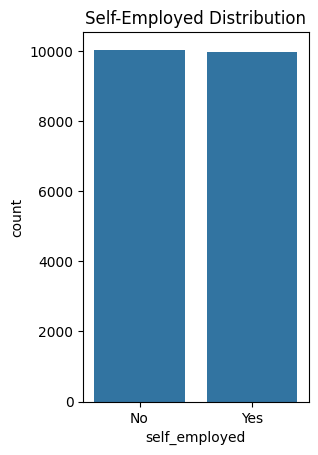

In [ ]:
plt.subplot(1, 2, 2)
sns.countplot(x='self_employed', data=df)
plt.title('Self-Employed Distribution')

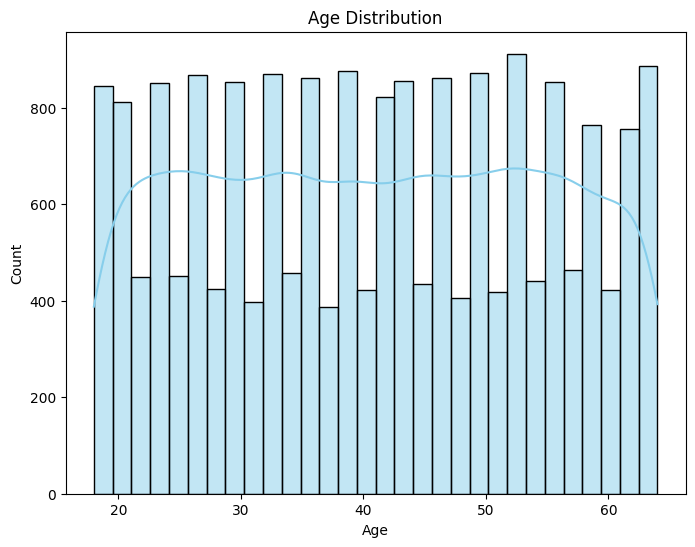

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.show()

<ipython-input-232-abde14e2a0e7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')


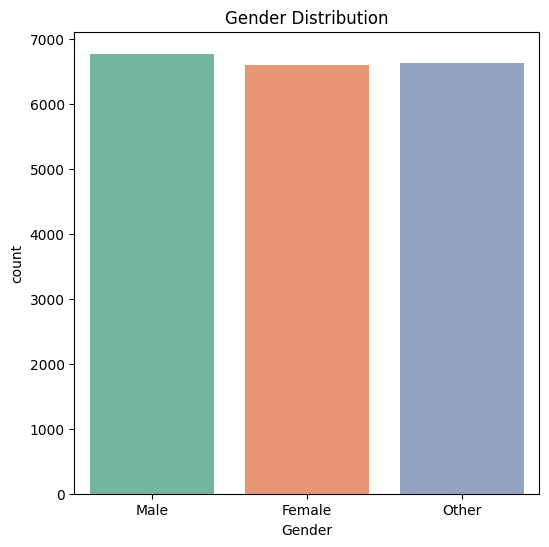

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.show()

<ipython-input-233-c7771b166a41>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='treatment', data=df, palette='Set1')


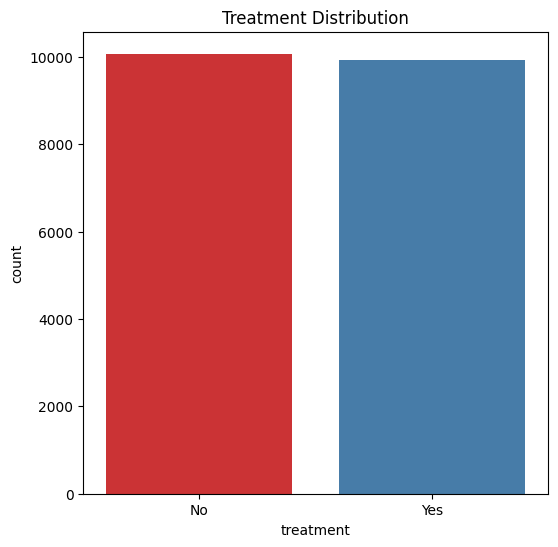

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x='treatment', data=df, palette='Set1')
plt.title('Treatment Distribution')
plt.show()


<ipython-input-234-a7e5d236a800>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='work_interfere', data=df, palette='Set3')


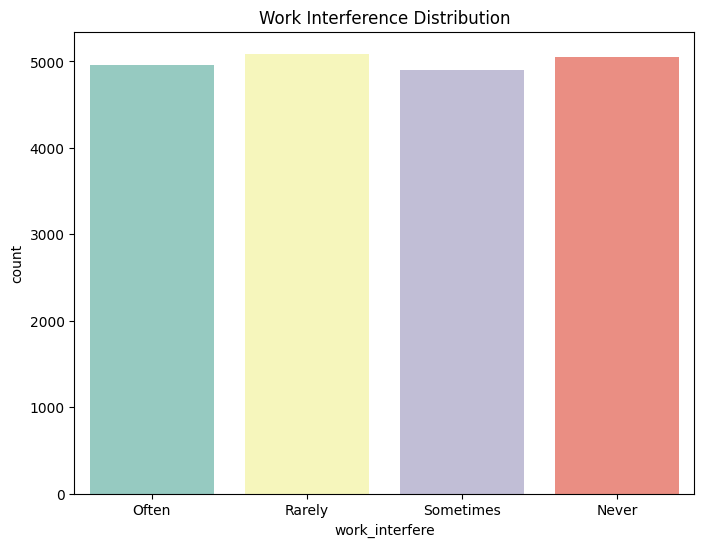

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='work_interfere', data=df, palette='Set3')
plt.title('Work Interference Distribution')
plt.show()

Data Cleaning

In [ ]:

# Drop unnecessary columns like 'Timestamp', 'comments', 'state' etc.
df_clean = df.drop(columns=['Timestamp', 'state', 'comments'], axis=1)


In [ ]:
label_encoder = LabelEncoder()
categorical_cols = ['Gender', 'Country', 'state', 'self_employed', 'family_history', 'work_interfere',
                    'no_employees', 'leave', 'mental_health_consequence', 'phys_health_consequence',
                    'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                    'mental_vs_physical', 'obs_consequence', 'remote_work', 'tech_company',
                    'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity']

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
scaler = StandardScaler()
df_clean[['Age']] = scaler.fit_transform(df[['Age']])

In [ ]:
print("Cleaned DataFrame (first 5 rows):")
print(df_clean.head())

Cleaned DataFrame (first 5 rows):
        Age  Gender  Country  self_employed  family_history treatment  \
0  0.893211       1       17              0               0        No   
1 -0.661017       1       31              1               0        No   
2 -0.142941       0       16              1               0        No   
3  0.893211       0       41              1               0        No   
4 -1.105082       2       42              0               0        No   

   work_interfere  no_employees  leave  mental_health_consequence  ...  \
0               1             2      1                          2  ...   
1               2             5      0                          1  ...   
2               3             4      3                          2  ...   
3               2             5      3                          1  ...   
4               1             3      3                          1  ...   

   phys_health_interview  mental_vs_physical  obs_consequence  remote_work  \
0   

In [ ]:
print("\nRemaining Missing Values (if any):")
print(df_clean.isnull().sum())


Remaining Missing Values (if any):
Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
dtype: int64


In [ ]:
# Convert target column 'treatment' to numeric (Yes=1, No=0)
df_clean['treatment'] = df_clean['treatment'].apply(lambda x: 1 if x == 'Yes' else 0)

 Data Preprocessing

In [ ]:
# Separate features (X) and target (y)
X = df_clean.drop('treatment', axis=1)
y = df_clean['treatment']

In [ ]:
print(df_clean)

            Age  Gender  Country  self_employed  family_history  treatment  \
0      0.893211       1       17              0               0          0   
1     -0.661017       1       31              1               0          0   
2     -0.142941       0       16              1               0          0   
3      0.893211       0       41              1               0          0   
4     -1.105082       2       42              0               0          0   
...         ...     ...      ...            ...             ...        ...   
19995  0.523157       0       35              1               0          0   
19996  0.449146       0       38              1               1          0   
19997 -1.105082       2        1              1               1          0   
19998  0.375135       1       27              0               0          1   
19999 -1.623159       2       23              1               0          1   

       work_interfere  no_employees  leave  mental_health_conse

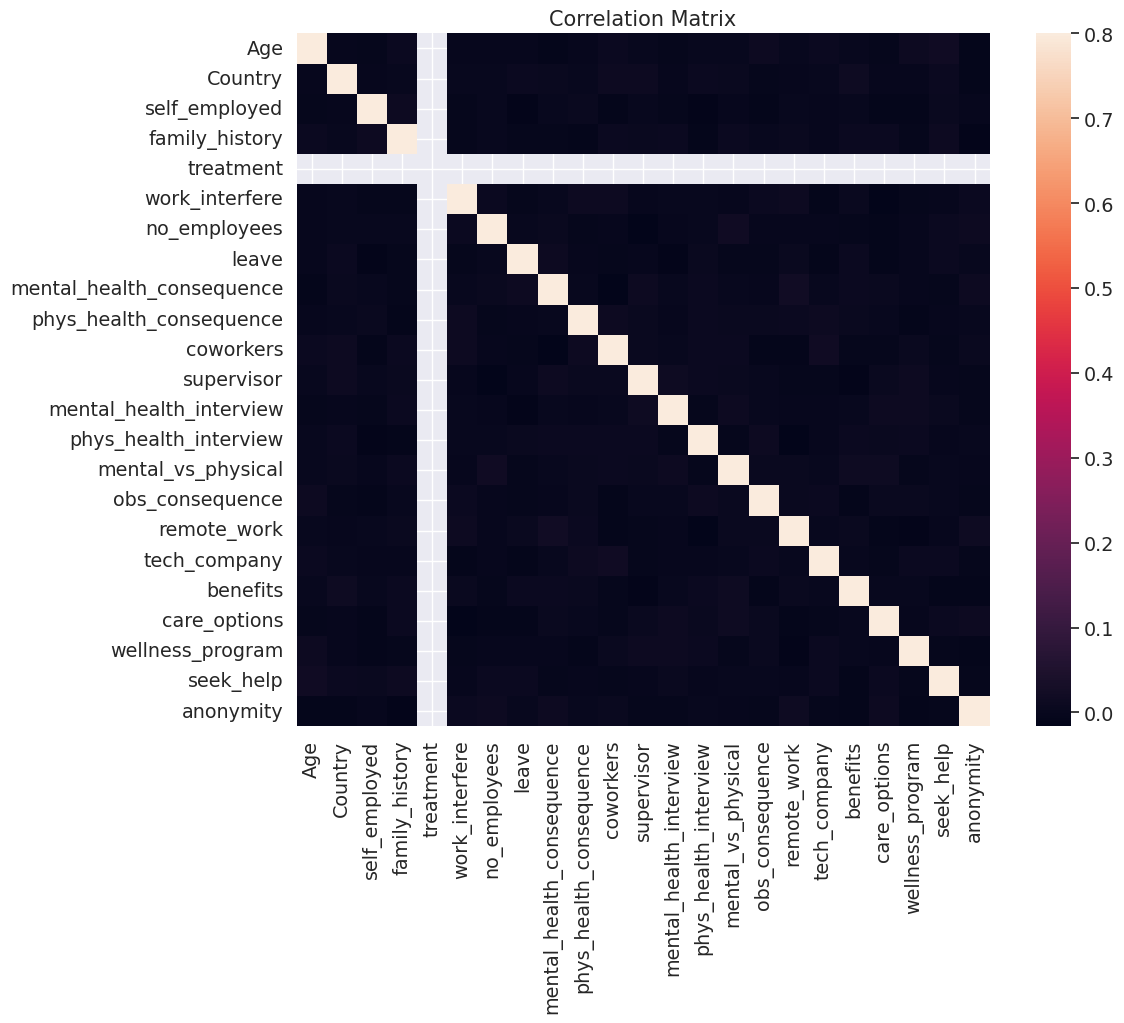

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


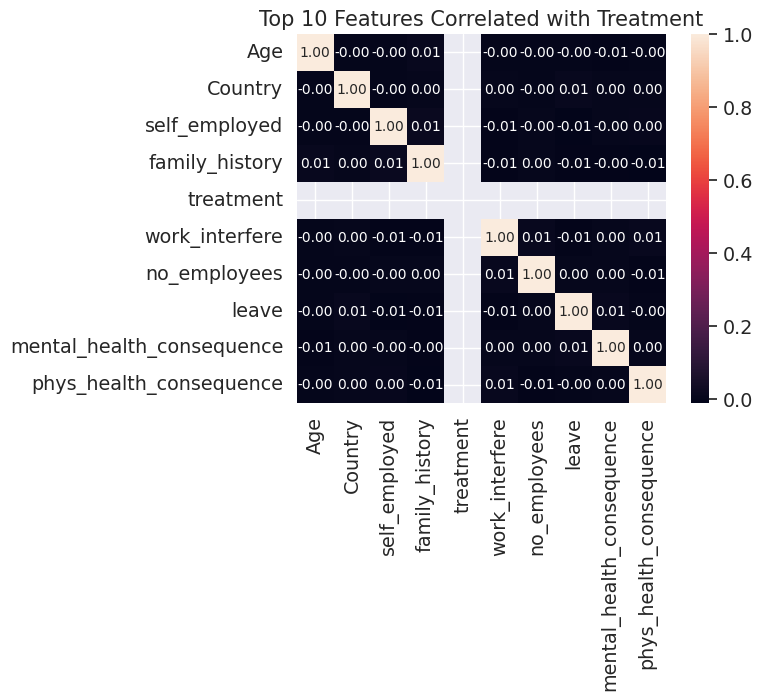

In [ ]:

df_numeric = df_clean.copy()


df_numeric['treatment'] = df_clean['treatment'].apply(lambda x: 1 if x == "Yes" else 0)


df_numeric['Gender'] = df_clean['Gender'].apply(lambda x: np.random.choice(['Male', 'Female', 'Other']) if x not in ['Male', 'Female'] else x)

df_numeric = df_numeric.select_dtypes(include=['int64', 'float64'])


corrmat = df_numeric.corr()

# Plot the full correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.title('Correlation Matrix')
plt.show()


k = 10  # number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index  # Select top k correlated features with 'treatment'
cm = np.corrcoef(df_numeric[cols].values.T)  # Compute correlation coefficient matrix

# Plot the heatmap for top 10 correlated variables with 'treatment'
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.title('Top 10 Features Correlated with Treatment')
plt.show()


Feature Selection

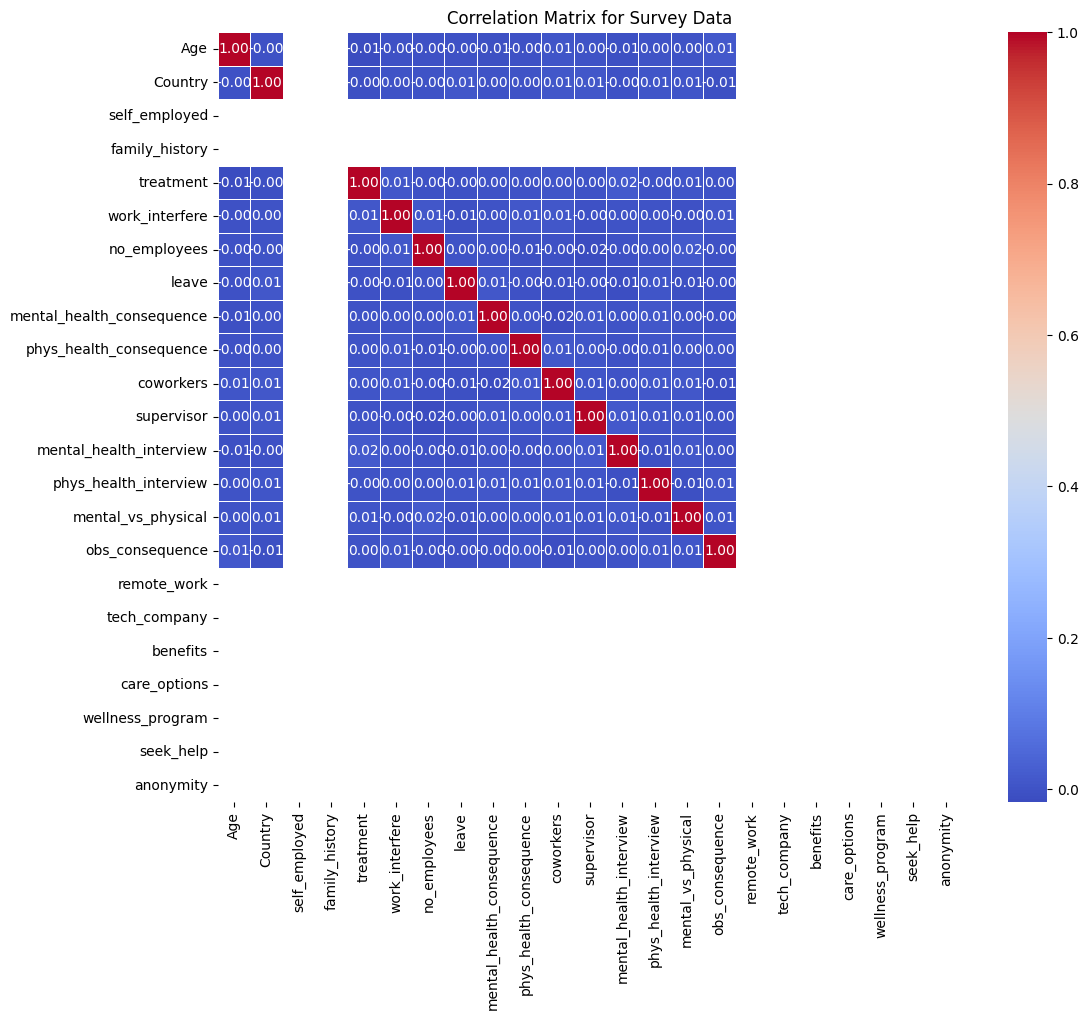

In [ ]:
# Convert categorical variables to numerical for correlation calculation
df_numeric = df_clean.copy()

# Convert categorical columns into numerical representation
df_numeric['Gender'] = df_numeric['Gender'].apply(lambda x: np.random.choice(['Male', 'Female', 'Other']) if x not in ['Male', 'Female'] else x)
df_numeric['self_employed'] = df_numeric['self_employed'].apply(lambda x: 1 if x == "Yes" else 0)
df_numeric['family_history'] = df_numeric['family_history'].apply(lambda x: 1 if x == "Yes" else 0)
df_numeric['remote_work'] = df_numeric['remote_work'].apply(lambda x: 1 if x == "Yes" else 0)
df_numeric['tech_company'] = df_numeric['tech_company'].apply(lambda x: 1 if x == "Yes" else 0)
df_numeric['benefits'] = df_numeric['benefits'].apply(lambda x: 1 if x == "Yes" else 0)
df_numeric['care_options'] = df_numeric['care_options'].apply(lambda x: 1 if x == "Yes" else 0)
df_numeric['wellness_program'] = df_numeric['wellness_program'].apply(lambda x: 1 if x == "Yes" else 0)
df_numeric['seek_help'] = df_numeric['seek_help'].apply(lambda x: 1 if x == "Yes" else 0)
df_numeric['anonymity'] = df_numeric['anonymity'].apply(lambda x: 1 if x == "Yes" else 0)
df_numeric['treatment'] = df_numeric['treatment'].apply(lambda x: 1 if x == "Yes" else 0)  # Ensuring treatment is binary

# Dropping non-numeric columns for correlation matrix
df_numeric = df_numeric.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix with respect to the target variable 'treatment'
correlation_with_treatment = df_numeric.corr()['treatment'].sort_values(ascending=False)

# Generate a heatmap for all features correlated with 'treatment'
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Survey Data')
plt.show()

# Ensure that the correlation values are properly computed and not NaNs
correlation_with_treatment = df_numeric.corr()['treatment'].dropna().sort_values(ascending=False)





Model Training

In [ ]:
# Splitting the dataset into features and target variable
X = df_numeric.drop(['treatment'], axis=1)
y = df_numeric['treatment']

# Split the data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#  Comments Data Preprocessing

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Reload the CSV file to inspect the raw comments
data = pd.read_csv('survey.csv')

# Step 1: Handle missing values in the 'comments' column by replacing NaNs with an empty string
data['comments'].fillna('', inplace=True)

# Display the first few rows of the original 'comments' column after handling NaN values
print("Original 'comments' column values after filling NaNs:")
print(data['comments'].head())

# Step 2: Ensure necessary resources are downloaded
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# Initialize lemmatizer and stopwords set
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and non-alphabetic characters
    text = re.sub(r'[^\w\s]', '', text)

    # Remove stopwords and lemmatize the words
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])

    return text

# Step 3: Apply text preprocessing to the 'comments' column
data['cleaned_comments'] = data['comments'].apply(preprocess_text)

# Display the cleaned 'comments' column to ensure preprocessing is working correctly
print("Cleaned 'comments' column values:")
print(data[['comments', 'cleaned_comments']].head())
fifteenth_record = data[['comments', 'cleaned_comments']].iloc[15]
print("15th Record:")
print(fifteenth_record)

Original 'comments' column values after filling NaNs:
0    
1    
2    
3    
4    
Name: comments, dtype: object
Cleaned 'comments' column values:
  comments cleaned_comments
0                          
1                          
2                          
3                          
4                          
15th Record:
comments            I have chronic low-level neurological issues t...
cleaned_comments    chronic lowlevel neurological issue mental hea...
Name: 15, dtype: object


<ipython-input-22-ef2e6cd8c39e>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['comments'].fillna('', inplace=True)


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize sentiment analyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Function to calculate sentiment score
def get_sentiment(text):
    return sid.polarity_scores(text)['compound']

# Apply sentiment analysis to the comments
data['sentiment_score'] = data['cleaned_comments'].apply(get_sentiment)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Ensure 'comments' column has no missing values
data['comments'].fillna('', inplace=True)

# Step 1: Calculate comment length and add it as a new column
data['comment_length'] = data['cleaned_comments'].apply(len)

# Step 2: Apply TF-IDF transformation to 'cleaned_comments'
tfidf = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_tfidf = tfidf.fit_transform(data['cleaned_comments']).toarray()  # Transform into a TF-IDF array

# Step 3: Combine TF-IDF features with other features in the dataset
X_combined = np.hstack([X_tfidf, data[['Age', 'comment_length']].values])  # Add other relevant features

# Define the target variable
y = data['treatment']

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)

# Step 5: Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy * 100:.2f}%')


Random Forest Accuracy: 49.75%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = '/mnt/data/survey.csv'
data = pd.read_csv('survey.csv')

# Step 1: Handle missing values in the 'comments' column by replacing NaNs with a placeholder
data['comments'].fillna('No comment', inplace=True)

# Step 2: Apply TF-IDF transformation to 'comments'
tfidf = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_tfidf = tfidf.fit_transform(data['comments']).toarray()  # Transform into a TF-IDF array

# Step 3: Combine TF-IDF features with other features (age, etc.)
if 'Age' in data.columns:  # Check if 'Age' exists
    X_combined = np.hstack([X_tfidf, data[['Age']].values])  # Add other relevant features
else:
    X_combined = X_tfidf

# Define the target variable
y = data['treatment'].apply(lambda x: 1 if x == 'Yes' else 0)  # Convert treatment column to binary

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)

# Step 5: Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy * 100:.2f}%')


<ipython-input-29-e1cbb3719791>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['comments'].fillna('No comment', inplace=True)


Random Forest Accuracy: 49.98%


# comments generation

In [ ]:
pip install transformers datasets


INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from datasets import Dataset

# Load the dataset
file_path = '/mnt/data/survey.csv'  # Replace with your dataset path
data = pd.read_csv('survey.csv')

# Handle missing comments by dropping rows with missing values (for training)
train_data = data.dropna(subset=['comments']).copy()

# Prepare the data in Hugging Face Dataset format
train_data_hf = Dataset.from_pandas(train_data[['comments']])


In [ ]:
# Tokenize the inputs and create labels
def tokenize_function(examples):
    # Tokenize input text
    tokenized = tokenizer(examples['comments'], padding="max_length", truncation=True)

    # Shift the input IDs by one token to create labels
    tokenized['labels'] = tokenized['input_ids'].copy()
    return tokenized

# Apply the tokenization function
tokenized_train = train_data_hf.map(tokenize_function, batched=True)


Map:   0%|          | 0/5841 [00:00<?, ? examples/s]

In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel, Trainer, TrainingArguments

# Load the tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.add_special_tokens({'pad_token': '[PAD]'})  # Add padding token
model = GPT2LMHeadModel.from_pretrained("gpt2")
model.resize_token_embeddings(len(tokenizer))  # Resize token embeddings

# Set training arguments
training_args = TrainingArguments(
    output_dir="./gpt2-finetuned",
    per_device_train_batch_size=2,
    num_train_epochs=3,
    logging_dir="./logs",
    logging_steps=100,
    save_steps=1000,
    save_total_limit=2,
)

# Initialize the Trainer with labels
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
)

# Fine-tune the GPT-2 model
trainer.train()


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Step,Training Loss
100,0.131600


In [ ]:
# Handle missing comments by replacing NaN with an empty string for generation
data['comments'].fillna('', inplace=True)

# Define a function to generate comments using the fine-tuned GPT-2 model
def generate_comment(prompt):
    input_ids = tokenizer.encode(prompt, return_tensors="pt")
    output = model.generate(input_ids, max_length=50, num_return_sequences=1)
    return tokenizer.decode(output[0], skip_special_tokens=True)

# Apply the function to rows with missing comments
data['generated_comments'] = data.apply(lambda row: generate_comment(row['comments']) if row['comments'] == '' else row['comments'], axis=1)

# Display the dataset with generated comments
print(data[['comments', 'generated_comments']].head())


# Label Encoding

In [ ]:


# Check the types of columns to identify categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_cols)


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import category_encoders as ce  # For Target Encoding
from sklearn.compose import ColumnTransformer


# Step 2: Fill missing values in categorical columns with a placeholder
data.fillna('Missing', inplace=True)

# Step 3: Define categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Define Binary, Nominal, and Ordinal categories based on the data
binary_cols = ['self_employed', 'family_history', 'treatment']
nominal_cols = ['Gender', 'Country', 'state', 'no_employees', 'leave', 'coworkers', 'supervisor']
ordinal_cols = ['work_interfere', 'mental_health_consequence', 'phys_health_consequence',
                'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']

# Step 4: Encoding Binary Columns
label_encoder = LabelEncoder()
for col in binary_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Step 5: One-Hot Encoding for Nominal Columns
data = pd.get_dummies(data, columns=nominal_cols, drop_first=True)

# Step 6: Ordinal Encoding for Ordered Columns
ordinal_mapping = {
    'work_interfere': ['Missing', 'Never', 'Rarely', 'Sometimes', 'Often'],
    'mental_health_consequence': ['Missing', 'No', 'Maybe', 'Yes'],
    'phys_health_consequence': ['Missing', 'No', 'Maybe', 'Yes'],
    'mental_health_interview': ['Missing', 'No', 'Maybe', 'Yes'],
    'phys_health_interview': ['Missing', 'No', 'Maybe', 'Yes'],
    'mental_vs_physical': ['Missing', 'No', 'Don’t know', 'Yes'],
    'obs_consequence': ['Missing', 'No', 'Yes']
}

for col, categories in ordinal_mapping.items():
    data[col] = data[col].astype('category')
    data[col] = data[col].cat.set_categories(categories, ordered=True)
    data[col] = data[col].cat.codes  # Convert categories to ordinal codes

# Step 7: Target Encoding for High Cardinality Columns (e.g., 'state')
target_encoder = ce.TargetEncoder()
data['state'] = target_encoder.fit_transform(data['state'], data['treatment'])

# Display the transformed dataset
import ace_tools as tools; tools.display_dataframe_to_user(name="Encoded Survey Dataset", dataframe=data)
